In [1]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
from tensorflow import keras
import tensorflow as tf

/opt/homebrew/Caskroom/miniforge/base/envs/ml/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [21]:
[test_set_raw, valid_set_raw, train_set_raw], info = tfds.load("tf_flowers",
                                                            split=["train[:10%]", "train[10%:25%]", "train[25%:]"], as_supervised=True,
                                                            with_info=True)

In [22]:
class_names = info.features["label"].names
n_classes = info.features["label"].num_classes
dataset_size = info.splits["train"].num_examples

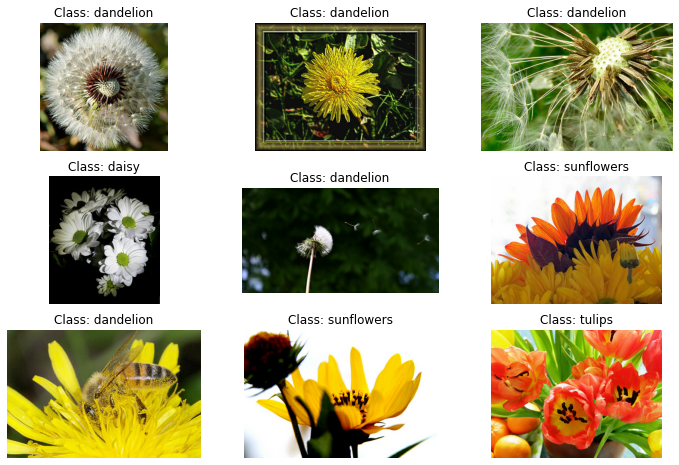

In [23]:
plt.figure(figsize=(12, 8))
index = 0
sample_images = train_set_raw.take(9) 
for image, label in sample_images:
    index += 1
    plt.subplot(3, 3, index)
    plt.imshow(image)
    plt.title("Class: {}".format(class_names[label])) 
    plt.axis("off")
plt.show(block=False)

In [24]:
def preprocess(image, label):
    resized_image = tf.image.resize(image, [224, 224]) 
    return resized_image, label

In [25]:
batch_size = 32
train_set = train_set_raw.map(preprocess).shuffle(dataset_size).batch(batch_size).prefetch(1)
valid_set = valid_set_raw.map(preprocess).batch(batch_size).prefetch(1) 
test_set = test_set_raw.map(preprocess).batch(batch_size).prefetch(1)

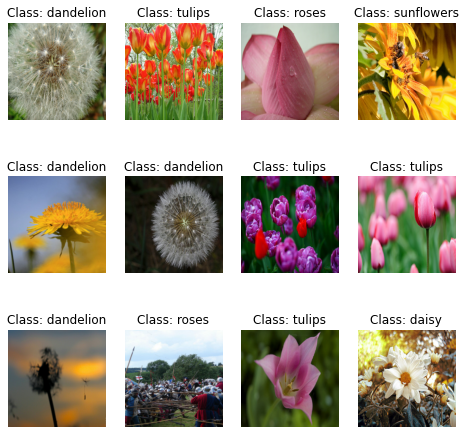

In [26]:
plt.figure(figsize=(8, 8)) 
sample_batch = train_set.take(1)
for X_batch, y_batch in sample_batch:
    for index in range(12):
        plt.subplot(3, 4, index + 1) 
        plt.imshow(X_batch[index]/255.0)
        plt.title("Class: {}".format(class_names[y_batch[index]])) 
        plt.axis("off")
plt.show()

In [27]:
train_set

<PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>

In [28]:
tf.config.run_functions_eagerly(True)
model = keras.models.Sequential()
model.add(keras.layers.Input(shape=(224,224,  3)))
model.add(keras.layers.experimental.preprocessing.Rescaling(1./255))
model.add(keras.layers.Conv2D(32, (7, 7), activation='relu'))
model.add(keras.layers.MaxPooling2D((2, 2)))
model.add(keras.layers.Conv2D(64, (3, 3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2, 2)))
model.add(keras.layers.Conv2D(64, (3, 3), activation='relu'))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(n_classes, activation='softmax'))
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'], )

In [29]:
history = model.fit(train_set,
                    epochs=10,
                    validation_data=valid_set)

Epoch 1/10


/opt/homebrew/Caskroom/miniforge/base/envs/ml/lib/python3.9/site-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


86/86 [==============================] - 41s 469ms/step - loss: 1.7502 - accuracy: 0.2569 - val_loss: 1.5423 - val_accuracy: 0.2995
Epoch 2/10
86/86 [==============================] - 40s 469ms/step - loss: 1.5380 - accuracy: 0.3347 - val_loss: 1.4178 - val_accuracy: 0.4410
Epoch 3/10
86/86 [==============================] - 40s 468ms/step - loss: 1.4229 - accuracy: 0.3990 - val_loss: 1.4270 - val_accuracy: 0.3956
Epoch 4/10
86/86 [==============================] - 40s 467ms/step - loss: 1.2853 - accuracy: 0.4767 - val_loss: 1.3450 - val_accuracy: 0.4646
Epoch 5/10
86/86 [==============================] - 40s 467ms/step - loss: 1.0975 - accuracy: 0.5774 - val_loss: 1.3285 - val_accuracy: 0.4991
Epoch 6/10
86/86 [==============================] - 40s 468ms/step - loss: 0.8970 - accuracy: 0.6566 - val_loss: 1.4292 - val_accuracy: 0.4828
Epoch 7/10
86/86 [==============================] - 40s 468ms/step - loss: 0.7023 - accuracy: 0.7558 - val_loss: 1.9201 - val_accuracy: 0.5064
Epoch 8/10

In [30]:
_, acc_train = model.evaluate(train_set)
_, acc_valid = model.evaluate(valid_set)
_, acc_test = model.evaluate(test_set)

12/12 [==============================] - 1s 111ms/step - loss: 1.8952 - accuracy: 0.5886


In [31]:
import pickle

with open('simple_cnn_acc.pkl','wb') as f:
    pickle.dump((acc_train,acc_valid,acc_test),f)

In [17]:
def preproces(image, label):
    resized_image = tf.image.resize(image, [224, 224])
    final_image = tf.keras.applications.xception.preprocess_input(resized_image) 
    return final_image, label

In [18]:
batch_size = 32
train_set = train_set_raw.map(preproces).shuffle(dataset_size).batch(batch_size).prefetch(1)
valid_set = valid_set_raw.map(preproces).batch(batch_size).prefetch(1) 
test_set = test_set_raw.map(preproces).batch(batch_size).prefetch(1)

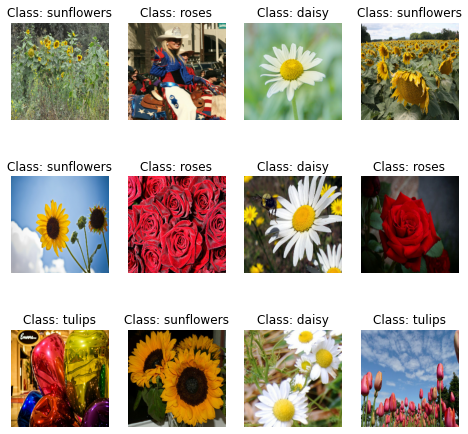

In [19]:
plt.figure(figsize=(8, 8)) 
sample_batch = train_set.take(1)
for X_batch, y_batch in sample_batch:
    for index in range(12):
        plt.subplot(3, 4, index + 1)
        plt.imshow(X_batch[index] / 2 + 0.5)
        plt.title("Class: {}".format(class_names[y_batch[index]])) 
        plt.axis("off")
plt.show()

In [34]:
base_model = tf.keras.applications.xception.Xception(weights="imagenet", input_shape=[224, 224, 3], include_top=False)
for layer in base_model.layers: 
    layer.trainable = False

In [37]:
x = keras.layers.GlobalAveragePooling2D()(base_model.output)
output = keras.layers.Dense(5, activation='softmax')(x)
model = keras.Model(base_model.inputs,output)
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
history = model.fit(train_set,
                    epochs=5,
                    validation_data=valid_set)

Epoch 1/5
24/86 [=======>......................] - ETA: 1:38 - loss: 6.2379 - accuracy: 0.2344

In [ ]:
for layer in base_model.layers: 
    layer.trainable = True

In [ ]:
history = model.fit(train_set,
                    epochs=10,
                    validation_data=valid_set)